## **Predictive Modelling of Customer Churn and Retention Strategies for a Telecommunication Company: An Analysis for Vodafone Corporation**
## BUSINESS UNDERSTANDING

As a leading telecommunication corporation recognizes the criticality of customer retention in sustaining business growth. The escalating issue of customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analysing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

The primary objective is to develop robust machine-learning models to predict customer churn accurately. By analysing historical customer data, the aim is to identify key indicators of churn and formulate targeted retention strategies to reduce customer attrition to achieve higher profitability.

This dataset contains different features information such as:

* Gender — Whether the customer is a male or a female

* SeniorCitizen — Whether a customer is a senior citizen or not

* Partner — Whether the customer has a partner or not (Yes, No)

* Dependents — Whether the customer has dependents or not (Yes, No)

* Tenure — Number of months the customer has stayed with the company

* Phone Service — Whether the customer has a phone service or not (Yes, No)

* MultipleLines — Whether the customer has multiple lines  

* InternetService — Customer’s internet service provider (DSL, Fiber Optic, No)

* OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet)

* OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet)

* DeviceProtection — Whether the customer has device protection or not (Yes, No, No internet service)

* TechSupport — Whether the customer has tech support or not (Yes, No, No internet)

* StreamingTV — Whether the customer has streaming TV or not (Yes, No, No internet service)

* StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet service)

* Contract — The contract term of the customer (Month-to-Month, One year, Two year)

* PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

* Payment Method — The customer’s payment method (Electronic check, mailed check, Bank transfer(automatic), Credit 
card(automatic))

* MonthlyCharges — The amount charged to the customer monthly

* TotalCharges — The total amount charged to the customer

* Churn — Whether the customer churned or not (Yes or No)

##             HYPOTHESIS

* Null Hypothesis (H0): There is no significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

* Alternative Hypothesis (H1): There is a significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

## QUESTIONS

 
1. How do contract terms and payment methods correlate with customer churn?

2. Are there specific services that significantly impact churn rates?

3. Are there specific services that customers with longer contract terms tend to use more frequently?

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

5. Are senior citizens more or less likely to churn compared to non senior citizens?





## DATA UNDERSTANDING
## Importation

In [38]:
# Import necessary libraries for data handling 
import pyodbc
import pandas as pd
import numpy as np
from dotenv import dotenv_values

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# hypothesis testing
from scipy.stats import chi2_contingency

# Machine learning classification model from sklean
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from functools import partial
from sklearn.metrics import roc_curve, auc

# class imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as impipeline

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV

# Other utilities
import joblib
import os
import pickle





## Data Loading
#### **Training Set_1 (SQL)**

In [39]:
#PULLING VARIABLES from an environment
environment_variables = dotenv_values('.env')
 
database = environment_variables.get("database_name")
server = environment_variables.get("server_name")
username = environment_variables.get("Login")
password = environment_variables.get("password")
 
# defining a connection string for connecting to our SQL server datatbase
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
 
# establish a database connection using the 'pyodbc' library
connection = pyodbc.connect(connection_string)

In [40]:
query = 'SELECT * FROM dbo.LP2_Telco_churn_first_3000'

data1 = pd.read_sql(query,connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True



#### **Training Set_2 (CSV)**

In [41]:
data2 = pd.read_csv('LP2_Telco-churn-last-2000.csv')
data2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [42]:
# Checking the column headers for Data1
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
# Checking the column headers for Data2 
data2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


#### **Concatenating the dataset from the two sources into one dataframe**

In [44]:
df = pd.concat([data1,data2])

#reset index of the conc dataset
df = df.reset_index(drop=True)
df = pd.DataFrame(df)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


* INSIGHTS: The Variables; 'Churn', 'PaperlessBilling', 'StreamingMovies','StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'PhoneService', 'Dependents' and 'Partner' have inconsistent enteries (Yes, No, False and True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


* INSIGHTS: The above (.info()) shows that:
 
Categorical variable: SeniorCitizen column is of datatype int64.
Numeric variable: TotalCharges column is of datatype object.

The variables: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection,
TechSupport, StreamingTV, StreamingMovies, TotalCharges and Churn have missing values.
 


In [46]:
# Change the datatype of the variable 'TotalCharges' to a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [47]:
# Standardizing the enteries in specific columns 
# list out the columns with inconsistent enteries
boolean_columns = ['Churn', 'PaperlessBilling', 'StreamingMovies','StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'PhoneService', 'Dependents', 'Partner']

# Iterate through each column and replace True/False with 'Yes'/'No'
for column in boolean_columns:
    df[column] = df[column].replace({True: 'Yes', False: 'No'})

# drop unneeded column
columns_drop = ['customerID']
df = df.drop(columns=columns_drop)

# Verify changes
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.500000,No
5039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.900000,No
5040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.450000,No
5041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.600000,Yes


In [48]:
# check for duplicates
dup = df.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 10 duplicates


In [49]:
# Drop duplicates
df = df.drop_duplicates()

# reset the index
df = df.reset_index(drop=True)

# Verify Changes
ver = df.duplicated().sum()
print(f'This dataset has',ver,'duplicates')

This dataset has 0 duplicates


In [50]:
# check null values
df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 1
dtype: int64

In [51]:
# Check the percentage of missing values
(df.isnull().sum()/(len(df)))*100

gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        5.344725
InternetService      0.000000
OnlineSecurity      12.835287
OnlineBackup        12.835287
DeviceProtection    12.835287
TechSupport         12.835287
StreamingTV         12.835287
StreamingMovies     12.835287
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.158951
Churn                0.019869
dtype: float64

In [52]:
# veiwing the type of null values 
selected_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']
df_selected = df[selected_columns]
df_selected


,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalCharges,Churn
0,None,No,Yes,No,No,No,No,29.850000,No
1,No,Yes,No,Yes,No,No,No,1889.500000,No
2,No,Yes,Yes,No,No,No,No,108.150002,Yes
3,None,Yes,No,Yes,Yes,No,No,1840.750000,No
4,No,No,No,No,No,No,No,151.649994,Yes
...,...,...,...,...,...,...,...,...,...
5028,Yes,Yes,No,Yes,Yes,Yes,Yes,1990.500000,No
5029,Yes,No,Yes,Yes,No,Yes,Yes,7362.900000,No
5030,No phone service,Yes,No,No,No,No,No,346.450000,No
5031,Yes,No,No,No,No,No,No,306.600000,Yes


In [53]:
# View the unique enteries in the selected columns
print("Unique values in 'Churn' column:")
print(df_selected['Churn'].unique())

print("\nUnique values in 'MultipleLines' column:")
print(df_selected['MultipleLines'].unique())

print("\nUnique values in 'OnlineSecurity' column:")
print(df_selected['OnlineSecurity'].unique())

print("\nUnique values in 'OnlineBackup' column:")
print(df_selected['OnlineBackup'].unique())

print("\nUnique values in 'DeviceProtection' column:")
print(df_selected['DeviceProtection'].unique())

print("\nUnique values in 'TechSupport' column:")
print(df_selected['TechSupport'].unique())

print("\nUnique values in 'StreamingTV' column:")
print(df_selected['StreamingTV'].unique())

print("\nUnique values in 'StreamingMovies' column:")
print(df_selected['StreamingMovies'].unique())

print("\nUnique values in 'StreamingTV' column:")
print(df_selected['StreamingTV'].unique())

Unique values in 'Churn' column:
['No' 'Yes' None]

Unique values in 'MultipleLines' column:
[None 'No' 'Yes' 'No phone service']

Unique values in 'OnlineSecurity' column:
['No' 'Yes' None 'No internet service']

Unique values in 'OnlineBackup' column:
['Yes' 'No' None 'No internet service']

Unique values in 'DeviceProtection' column:
['No' 'Yes' None 'No internet service']

Unique values in 'TechSupport' column:
['No' 'Yes' None 'No internet service']

Unique values in 'StreamingTV' column:
['No' 'Yes' None 'No internet service']

Unique values in 'StreamingMovies' column:
['No' 'Yes' None 'No internet service']

Unique values in 'StreamingTV' column:
['No' 'Yes' None 'No internet service']


* INSIGHTS: 
* The percentage of missing values is ~5% for MultipleLines and ~13% for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies. 
* Null values are of the type 'None' and not 'NaN'.

In [54]:
# Replace 'None' with NaN for consistency
df.replace({None: np.nan}, inplace=True)

## EDA

In [55]:
# Getting the summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5033.0,0.162726,0.369152,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5033.0,32.639380,24.513706,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5033.0,65.144953,30.056317,18.400000,35.900002,70.600000,90.050003,118.650002
TotalCharges,5025.0,2306.569374,2269.488745,18.799999,419.700012,1406.650024,3865.600098,8670.100000


* INSIGHTS: 
1. **Tenure:**

* The average tenure of customers is around 32.58 months, with a wide range from 0 to 72 months.
* The majority of customers have a tenure below the 75th percentile (56 months), as indicated by the relatively lower median (29 months).

2. **Monthly Charges:**

* The average monthly charge is $65.09, with a standard deviation of $30.07.
* Monthly charges range from $18.40 to $118.65, indicating variability in pricing.
* The median monthly charge is $70.55, which is higher than the mean, suggesting a right-skewed distribution.

3. **Total Charges:**

* The total charges have a wide range, with an average of $2302.06 and a standard deviation of $2269.48.
* Some customers have significantly higher total charges, as indicated by the high maximum value of $8670.10.
* There is a noticeable difference between the median ($1401.15) and mean, suggesting potential skewness or possible outliers.

In [56]:
# Seperating Numerical and categorical variables for easy analysis
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


### Univariate Analysis

SeniorCitizen
Skew : 1.83


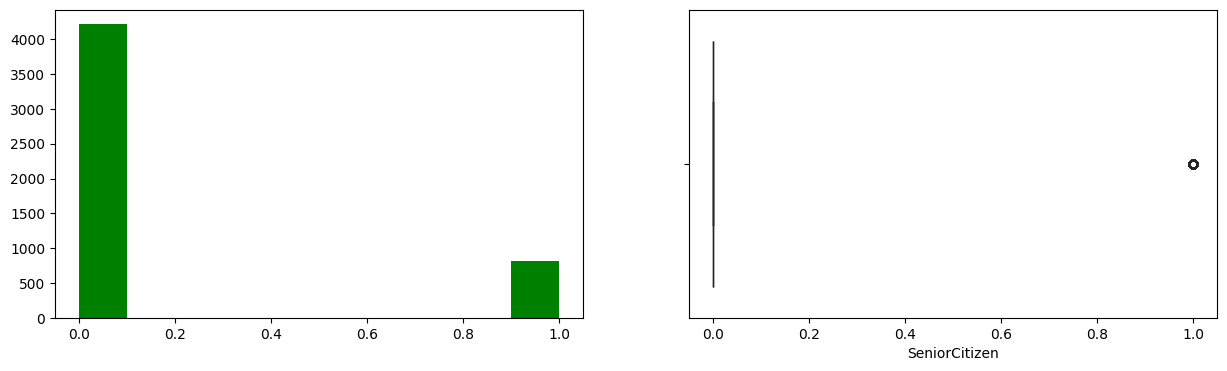

tenure
Skew : 0.22


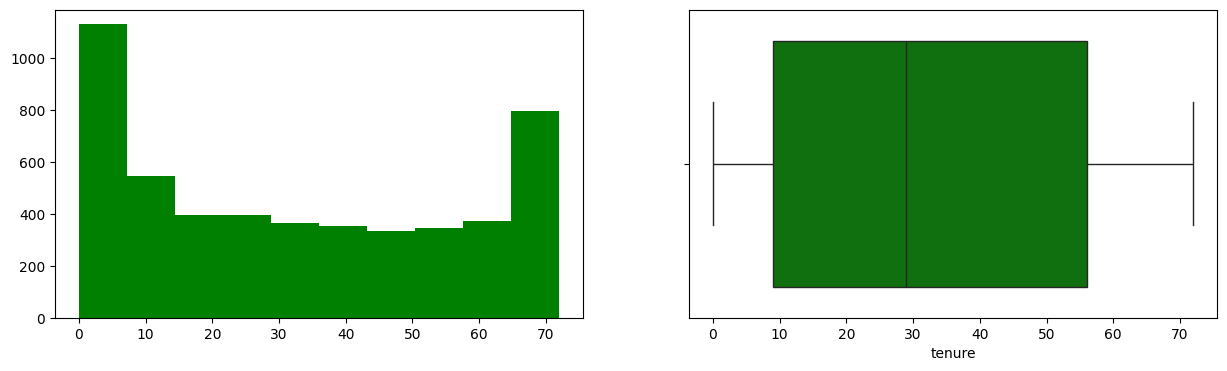

MonthlyCharges
Skew : -0.24


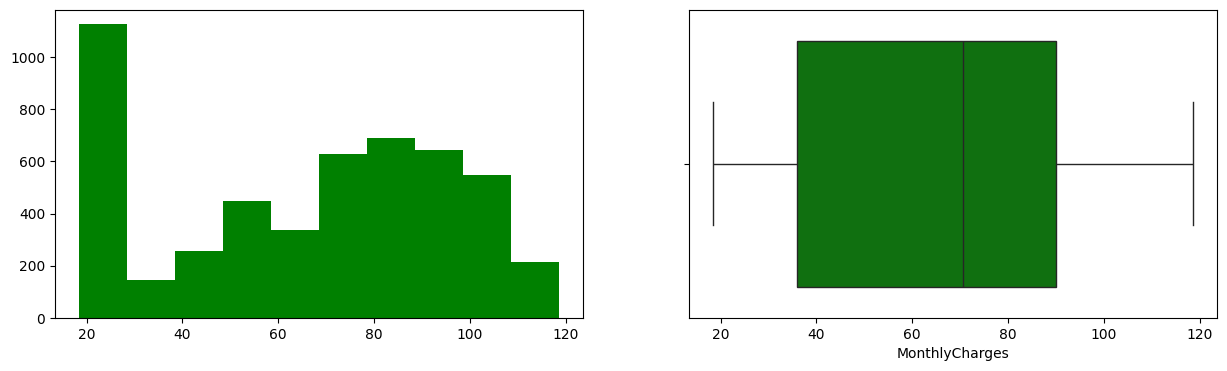

TotalCharges
Skew : 0.94


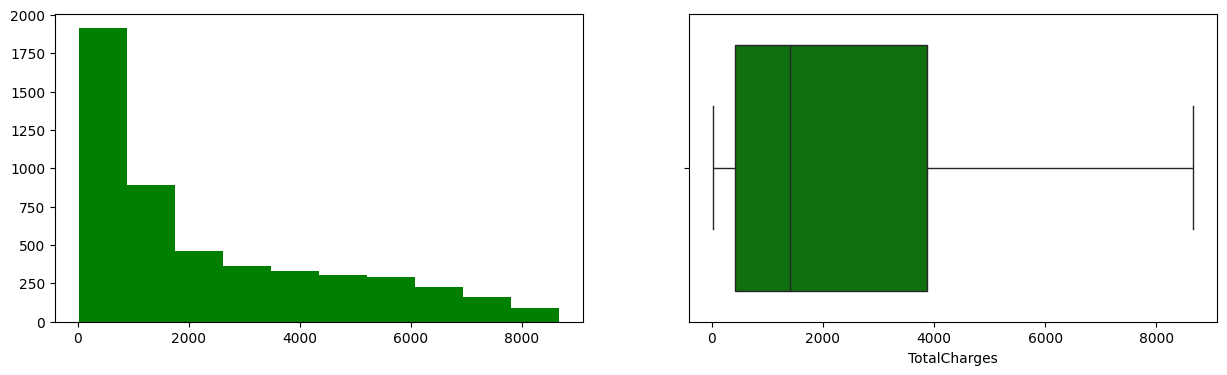

In [107]:
# Visualizing the distribution of the numerical columns using histogram and box plot side by side while printing the skewness
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, color ="green")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='green')
    plt.show()

* INSIGHTS: The visualization reveals the distributions of continuous numerical columns are notably uneven, predominantly exhibiting positive skewness with monthly Charges negatively skewed. This observation suggests that these columns may benefit from transformations to achieve a more balanced distribution, which can positively impact the performance of machine learning models.

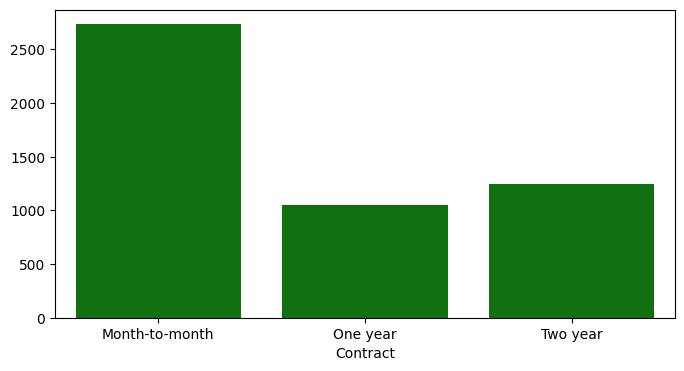

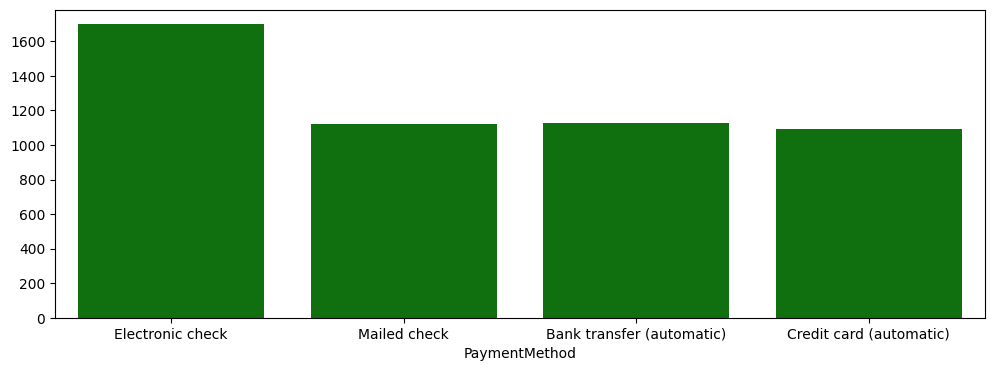

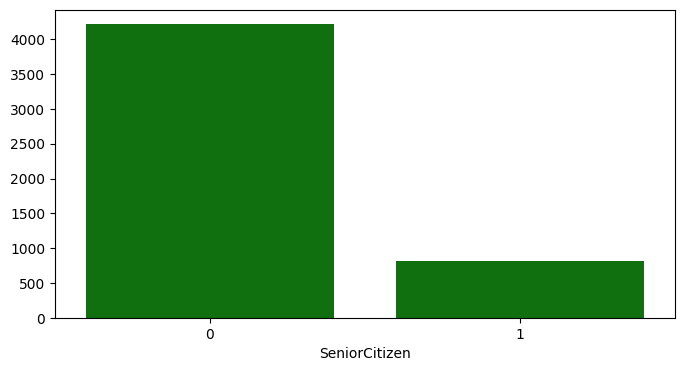

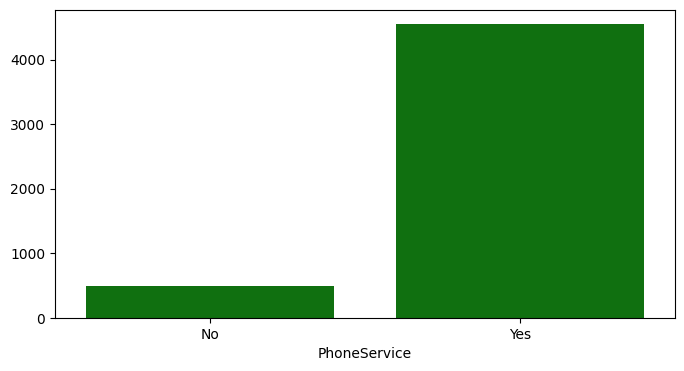

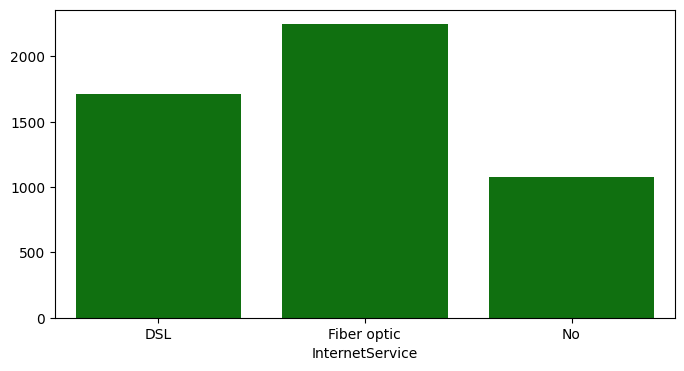

In [108]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = df, x="Contract",color = "green")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(12,4))
ax = sns.countplot(x ="PaymentMethod", data = df, color = "green")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(x="SeniorCitizen",data= df,color = "green")
ax.set(ylabel=None)
plt.show()


plt.figure(figsize=(8,4))
ax = sns.countplot(x="PhoneService",data= df,color = "green")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(x="InternetService",data= df,color = "green")
ax.set(ylabel=None)
plt.show()

* INSIGHT: The visualization reveals skewness in majority of the categories. This imbalance in our key features may adversely impact the quality and predictive accuracy of our model, emphasizing the need for balance to enhance model performance.

### Bi-variate Analysis

In [59]:
# relationship among features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.003477,0.221327,0.094449
tenure,0.003477,1.000000,0.239026,0.825889
MonthlyCharges,0.221327,0.239026,1.000000,0.646709
TotalCharges,0.094449,0.825889,0.646709,1.000000


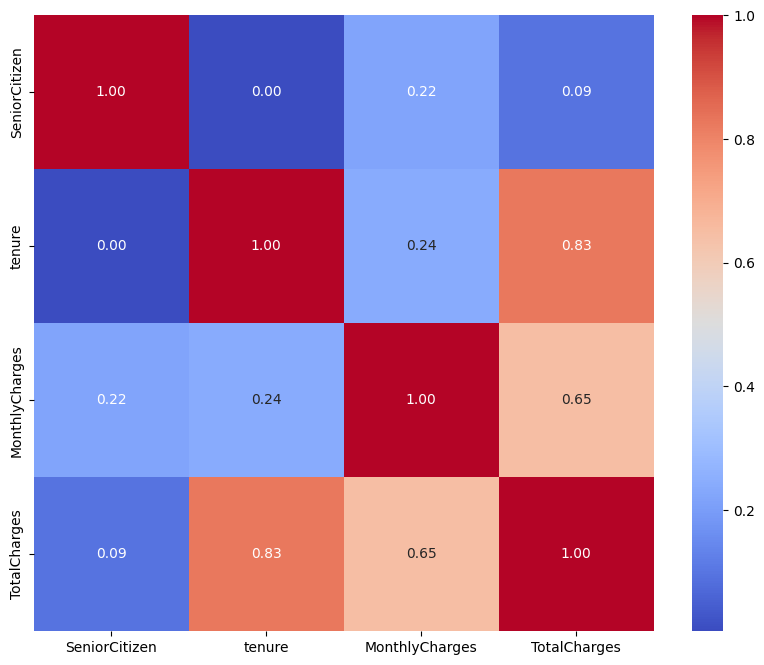

In [60]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: The correlation matrix reveals positive correlations between tenure and both monthly and total charges, with a stronger correlation observed between tenure and total charges, while senior citizenship exhibits a modest positive correlation with both monthly and total charges in the dataset

In [61]:
# Create a contingency table 
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
contingency_table 

Churn,No,Yes
Contract,,
Month-to-month,1555,1179
One year,933,122
Two year,1213,30


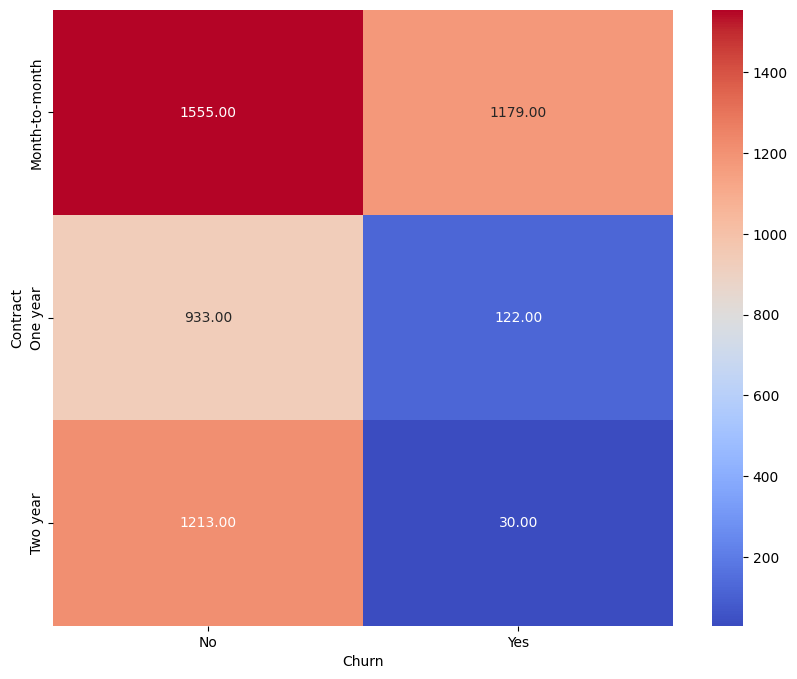

In [62]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: Customers with month-to-month contracts exhibit the highest churn rate, suggesting that this contract type may be associated with a greater likelihood of customer attrition. In contrast, customers with two-year contracts show a substantially lower churn rate, indicating a potential correlation between contract duration and customer retention. This insight emphasizes the importance of considering contract terms when analyzing and addressing customer churn in the dataset and thus, aligns closely with our hypothesis

In [63]:
# Create a contingency table 
contingency_table2 = pd.crosstab(df['PaymentMethod'], df['Churn'])
contingency_table2 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),927,198
Credit card (automatic),922,168
Electronic check,941,756
Mailed check,911,209


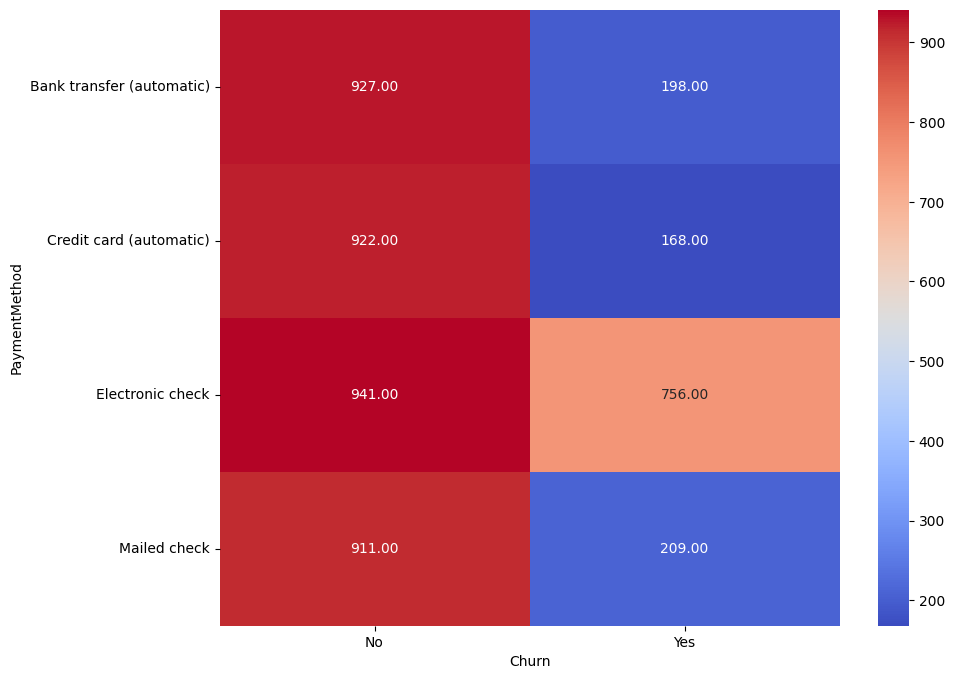

In [64]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: The observed variations in churn across different payment methods, notably higher churn among customers using Electronic check compared to Bank transfer (automatic), Credit card (automatic), and Mailed check, indicate that the choice of payment method could be a significant factor influencing customer churn. These findings offer valuable insights for further investigation and validation of our initial hypothesis.

### Multivariate Analysis

<Figure size 1000x800 with 0 Axes>

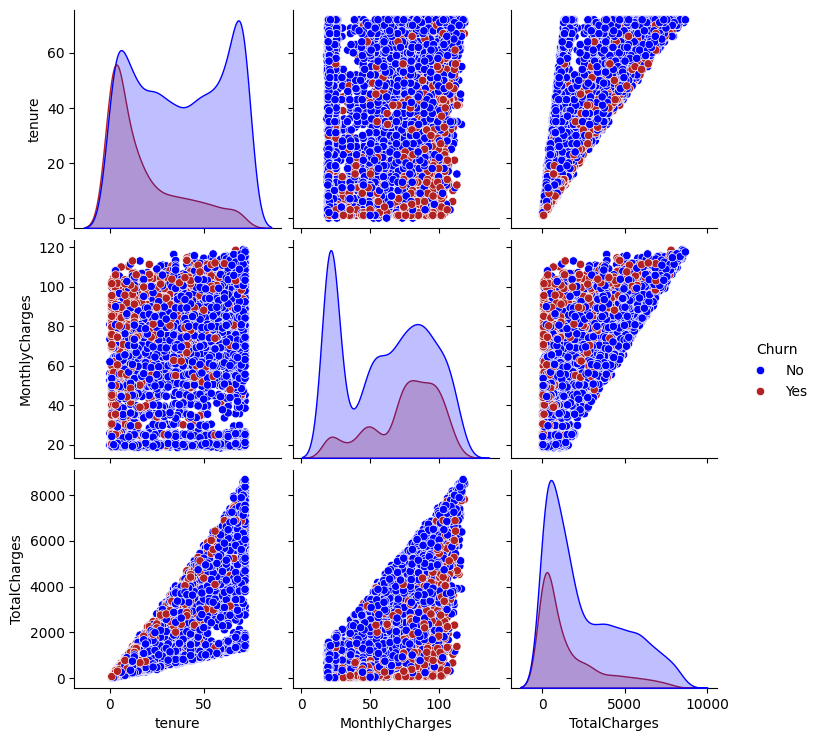

In [110]:
data = df[["tenure","MonthlyCharges",'TotalCharges','Churn']]
plt.figure(figsize=(10, 8))
sns.pairplot(data, palette={'Yes':'Firebrick', 'No':'blue'}, hue = 'Churn')
plt.show()

In [66]:
# Defining mode value
most_frequent = df['Churn'].mode()[0]

# Filling null values in 'Churn' column with the most frequent value
df['Churn'].fillna(most_frequent, inplace=True)

# Verfiy Changes
df['Churn'].isnull().sum()

0

### Rename and handle null values and save the clean dataframe to excel file

In [67]:
df_preprocessed = pd.DataFrame(df)

# Check for null values after preprocessing
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())


Null values after preprocessing:
 gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          8
Churn                 0
dtype: int64


In [68]:
# Specify columns with missing values
numerical_cols = ['TotalCharges']
categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='median')
df_preprocessed[numerical_cols] = numerical_imputer.fit_transform(df_preprocessed[numerical_cols])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_preprocessed[categorical_cols] = categorical_imputer.fit_transform(df_preprocessed[categorical_cols])

# Verify Changes
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())


Null values after preprocessing:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [69]:
# Saving the DataFrame to an Excel file
desktop_path = r"C:\Users\hp\Desktop"
file_path = desktop_path + r'\df_preprocessed.xlsx'

df_preprocessed.to_excel(file_path, index=False)

## Answering Business Questions

1. How do contract terms and payment methods correlate with customer churn?

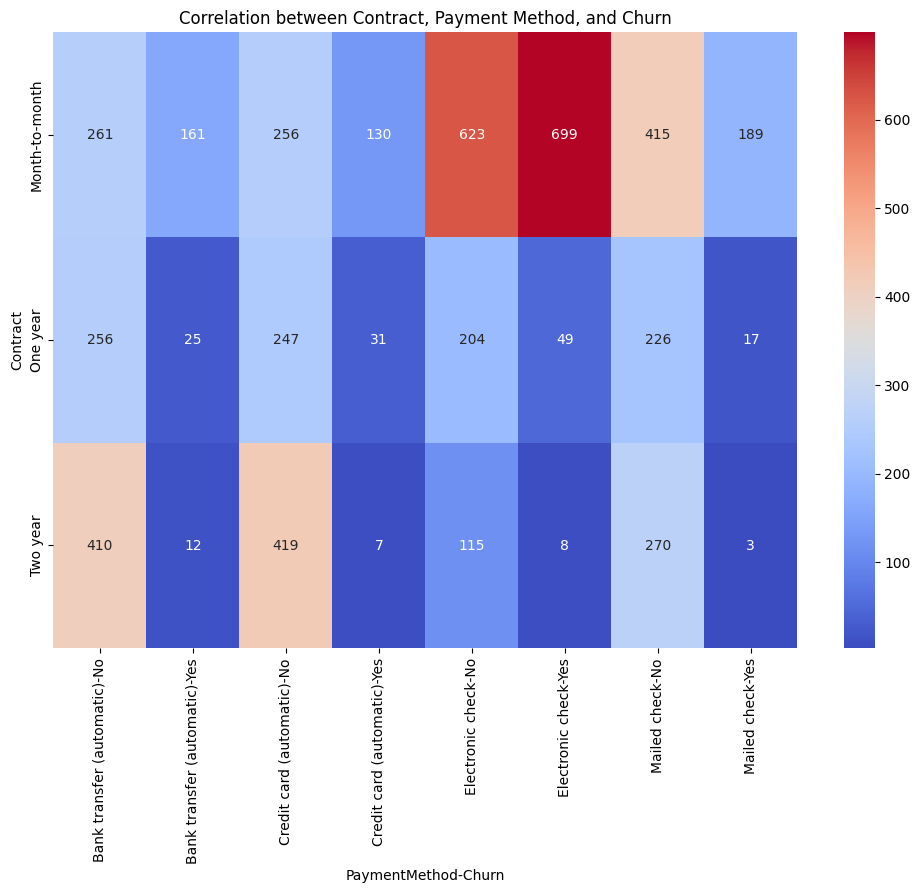

In [70]:
#  a contingency table
contingency_table3 = pd.crosstab(index=df_preprocessed['Contract'], columns=[df_preprocessed['PaymentMethod'], df_preprocessed['Churn']])


# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table3, annot=True, cmap='coolwarm', fmt='g')
plt.title('Correlation between Contract, Payment Method, and Churn')
plt.show()

**INSIGHTS:**
1. **Payment Method Impact:**
Customers using "Electronic check" as their payment method exhibit a higher churn rate compared to other methods.
Customers using "Bank transfer (automatic)" and "Credit card (automatic)" generally have lower churn rates.

2. **Contract Duration:**
Customers with a "Two-year" contract have the lowest churn rate across all payment methods, indicating that longer-term contracts are associated with higher customer retention.
"Month-to-month" contract customers show higher churn rates, emphasizing the importance of contract duration in customer retention.

3. **Churn Across Payment Methods:**
Among customers with "Month-to-month" contracts, "Electronic check" users experience the highest churn, while "Bank transfer (automatic)" users have a comparatively lower churn rate.

4. **Variability in Churn Rates:**
Churn rates vary significantly across different contract durations and payment methods, underscoring the importance of understanding these factors when devising customer retention strategies.

    In summary, the data suggests a correlation between payment methods, contract duration, and customer churn. Exploring strategies to encourage longer-term contracts and promoting specific payment methods might help mitigate churn and enhance overall customer retention.

2. Are there specific services that significantly impact churn rates?

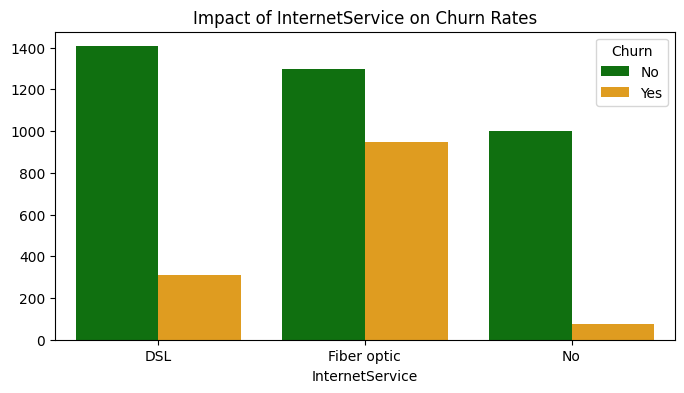

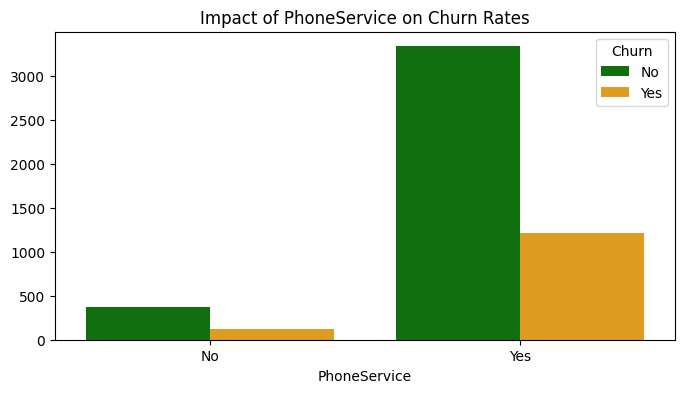

In [111]:
# bar plot
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='InternetService', hue='Churn', data=df_preprocessed, palette={'Yes':'orange', 'No':'green'})
ax.set(ylabel=None)
plt.title('Impact of InternetService on Churn Rates')
plt.show()

# bar plot 
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='PhoneService', hue='Churn', data=df_preprocessed, palette={'Yes':'orange', 'No':'green'})
ax.set(ylabel=None)
plt.title('Impact of PhoneService on Churn Rates')
plt.show()

**INSIGHTS:** 
The visualization indicates that the selected services; InternetService and PhoneService, have a notable impact on the churn rate. The predominance of "No Churn" in the visualization implies that customers utilizing these services are less likely to churn. This observation aligns with the understanding that specific services indeed play a significant role in influencing customer churn rates

3. Are there specific services that customers with longer contract terms tend to use more frequently?

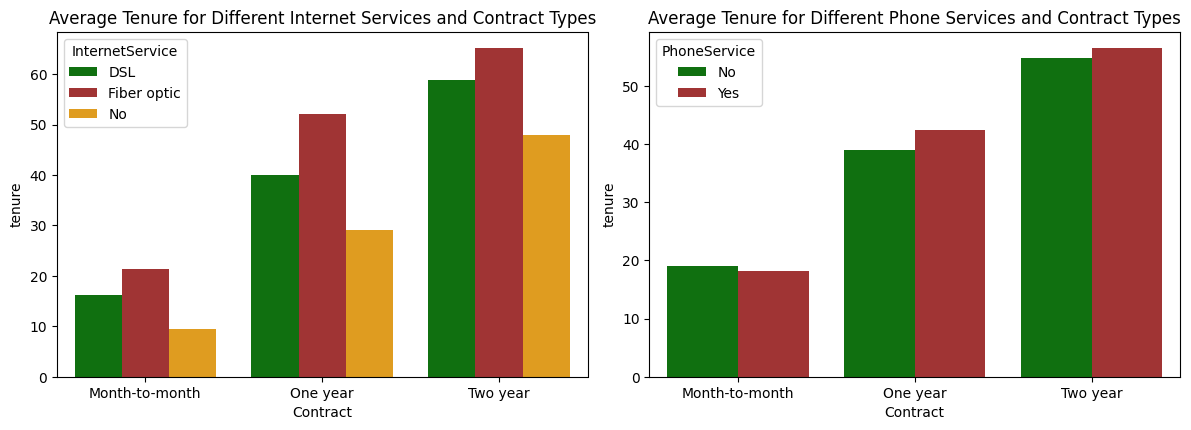

In [112]:
plt.figure(figsize=(12, 8))

# InternetService
plt.subplot(2, 2, 1)
sns.barplot(x='Contract', y='tenure', hue='InternetService', data=df_preprocessed, ci= None, palette={'Fiber optic':'Firebrick','DSL':'green','No':'orange'})
plt.title('Average Tenure for Different Internet Services and Contract Types')

# PhoneService
plt.subplot(2, 2, 2)
sns.barplot(x='Contract', y='tenure', hue='PhoneService', data=df_preprocessed, ci= None, palette={'Yes':'Firebrick', 'No':'green'})
plt.title('Average Tenure for Different Phone Services and Contract Types')

plt.tight_layout()
plt.show()


**INSIGHTS:**
Examining the bar plot for two services; specifically (InternetService) and (PhoneService), reveals that customers with extended contract terms predominantly choose Fiber Optic for internet service and use phone services more frequently. This observation implies a positive correlation between longer contract terms and increased usage of these selected services.

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

In [113]:
fig = px.histogram(df_preprocessed, x='PaymentMethod', color='Churn', barmode='stack',
                   color_discrete_map={'Yes':'orange', 'No':'green'},
                   labels={'PaymentMethod': 'Payment Method', 'Churn': 'Churn'},
                   title='Churn Patterns by Payment Method')

fig.update_layout(xaxis_title='Payment Method', yaxis_title='Count', showlegend=True)
fig.show()

**INSIGHTS:**
Analyzing the varied churn patterns associated with different customer payment methods, it becomes apparent that customers utilizing the (automatic) payment method tend to exhibit a pattern of 'No churn' (retaining services). In contrast, the (Electronic check) payment method displays a pattern of 'Yes churn' (churning). This observation aligns with the initial hypothesis, offering valuable insights into the relationship between payment methods and churn behavior.

5. Are senior citizens more or less likely to churn compared to non senior citizens?

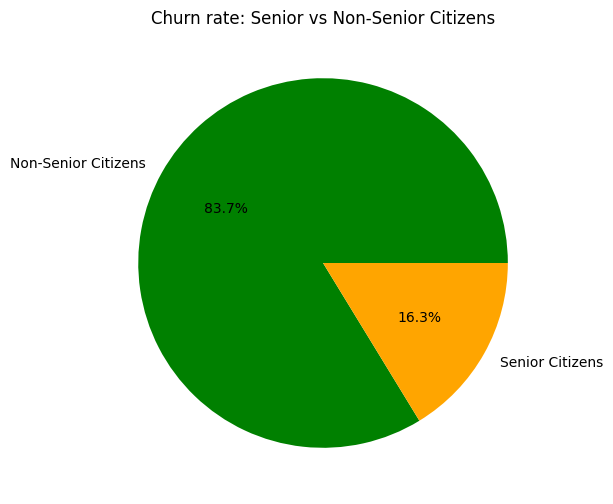

In [114]:
# Create a DataFrame with churn counts for senior and non-senior citizens
churn_counts = df_preprocessed['SeniorCitizen'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Non-Senior Citizens', 'Senior Citizens'], autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Churn rate: Senior vs Non-Senior Citizens')
plt.show()


**INSIGHTS:**
The chart above indicates that Senior Citizens have a churn rate of 16.3%, while non-Senior Citizens have a higher churn rate of 83.7%. Therefore, Senior Citizens are more likely to remain customers (as lower churn rate indicates a higher likelihood of customer retention) compared to non-Senior Citizens. This insight can be leveraged for strategic considerations, recognizing the lower churn rate among Senior Citizens."

# Hypothesis Testing

In [75]:

# create a contingency table, extract relevant columns (Contract and PaymentMethod)
contingency_table = pd.crosstab(df_preprocessed['Contract'], df_preprocessed['PaymentMethod'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Define significance level
alpha = 0.05

# Check the p-value against the significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in churn rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in churn rates.")


Chi-squared value: 728.184868827405
P-value: 5.0169960695311523e-154
Reject the null hypothesis. There is a significant difference in churn rates.


Insight:

* There is sufficient statistical evidence to reject the null hypothesis, revealing a noteworthy difference in churn rates between customers with extended contract terms and those utilizing the Automatic payment method.

## Data Preparation

Split data into input (x) and target (y) features

In [76]:
# Drop unnecessary columns and split the data
X = df.drop(['Churn'], axis=1)  # Features
y = df['Churn']  # Target variable

# Convert boolean values to strings
y_stratify = y.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_stratify)

### Feature Engineering

In [77]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5033 non-null   object 
 1   SeniorCitizen     5033 non-null   int64  
 2   Partner           5033 non-null   object 
 3   Dependents        5033 non-null   object 
 4   tenure            5033 non-null   int64  
 5   PhoneService      5033 non-null   object 
 6   MultipleLines     4764 non-null   object 
 7   InternetService   5033 non-null   object 
 8   OnlineSecurity    4387 non-null   object 
 9   OnlineBackup      4387 non-null   object 
 10  DeviceProtection  4387 non-null   object 
 11  TechSupport       4387 non-null   object 
 12  StreamingTV       4387 non-null   object 
 13  StreamingMovies   4387 non-null   object 
 14  Contract          5033 non-null   object 
 15  PaperlessBilling  5033 non-null   object 
 16  PaymentMethod     5033 non-null   object 


In [78]:
X_num_cols = X.select_dtypes(include=np.number).columns

X_cat_cols = X.select_dtypes(include=['object']).columns

# Verify changes
print("Categorical Variables:")
print(X_cat_cols)
print("Numerical Variables:")
print(X_num_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical Variables:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


#### Creating a pipeline

In [79]:
# LogTransformer class
class LogTransformer:
    def __init__(self, constant=1):
        self.constant = constant
 
    def transform(self, X_train):
        return np.log1p(X_train + self.constant)
 
 
# Numerical transformer with LogTransformer
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(LogTransformer().transform)),
    ('scaler', StandardScaler())
])
 
class BooleanToStringTransformer(TransformerMixin):
    def fit(self, X, y=None):
        # Fit logic here, if needed
        return self
 
    def transform(self, X):
        # Transformation logic here
        # Ensure to return the transformed data
        return X.astype(str)
 
 
# Categorical transformer
categorical_pipeline = Pipeline(steps=[
    ('bool_to_str', BooleanToStringTransformer()),
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder())
])
 
 
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, X_num_cols),
        ('cat', categorical_pipeline, X_cat_cols)
    ])

### Label Encoder

In [80]:
# Fit and transform the label encoder on y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Machine Learning Models

#### Compare Models - Unbalanced

In [81]:
# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]

# Iterate through models
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       741
           1       0.47      0.48      0.48       266

    accuracy                           0.72      1007
   macro avg       0.64      0.65      0.64      1007
weighted avg       0.72      0.72      0.72      1007

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       741
           1       0.66      0.59      0.63       266

    accuracy                           0.81      1007
   macro avg       0.76      0.74      0.75      1007
weighted avg       0.81      0.81      0.81      1007



Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       741
           1       0.57      0.55      0.56       266

    accuracy                           0.77      1007
   macro avg       0.70      0.70      0.70      1007
weighted avg       0.77      0.77      0.77      1007

Report for svm_classifier
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       741
           1       0.67      0.52      0.59       266

    accuracy                           0.81      1007
   macro avg       0.75      0.71      0.73      1007
weighted avg       0.80      0.81      0.80      1007

Report for sgd_classifier
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       741
           1       0.70      0.40      0.51       266

    accuracy                           0.80      1007
   macro avg       0.76      0.67      0.69 

* Insight: The logistic classifier appears to demonstrate strong overall performance by effectively identifying churn cases (recall) and minimizing false positives (precision). It achieves a good balance between precision and recall for both classes ('No' and 'Yes'). This stands in contrast to other models, where precision and recall are higher for the 'No' class, signifying superior predictive accuracy for the 'No' class but potentially sacrificing performance on the 'Yes' class.

### Balanced Dataset - RandomOverSampler

In [82]:
# balance the dataset using the randomoversmaplier
samplier = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = samplier.fit_resample(X_train, y_train_encoded)

In [83]:
# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]
# Iterate through models
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)


Report for tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       741
           1       0.50      0.51      0.51       266

    accuracy                           0.74      1007
   macro avg       0.66      0.66      0.66      1007
weighted avg       0.74      0.74      0.74      1007

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.91      0.72      0.80       741
           1       0.51      0.81      0.62       266

    accuracy                           0.74      1007
   macro avg       0.71      0.76      0.71      1007
weighted avg       0.81      0.74      0.76      1007

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       741
           1       0.47      0.75      0.58       266

    accuracy                           0.71      1007
   macro avg       0.68      0.72     

##### Insights
* Balancing the dataset has positively impacted the models, particularly in their ability to identify customers who will churn (improved recall for 'Yes').
* The logistic_classifier and svm_classifier stand out as models with balanced improvements in precision and recall for the 'Yes' class.

### Balanced Dataset - Using the SMOTE

In [84]:
# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]
# Iterate through models and apply SMOTE within the pipeline
for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)


Report for tree_classifier
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       741
           1       0.50      0.57      0.53       266

    accuracy                           0.74      1007
   macro avg       0.67      0.68      0.68      1007
weighted avg       0.75      0.74      0.74      1007

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       741
           1       0.51      0.80      0.62       266

    accuracy                           0.74      1007
   macro avg       0.71      0.76      0.71      1007
weighted avg       0.80      0.74      0.76      1007

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       741
           1       0.46      0.74      0.57       266

    accuracy                           0.71      1007
   macro avg       0.67      0.72     

Insights:

* Balancing the dataset with SMOTE has positively impacted the models, particularly in their ability to identify customers who will churn (improved recall for 'Yes').
* The logistic_classifier, svm_classifier, and sgd_classifier stand out as models with balanced improvements in precision and recall for the 'Yes' class.

Generally: Both SMOTE and RandomOverSampler have improved the models' ability to identify customers who will churn (improved recall for 'Yes') compared to the original imbalanced dataset, however, SMOTE tends to result in slightly better recall values for the 'Yes' class in most models when compared to the RandomOverSampler.

### Feature Importance and Selection 

In [85]:
# Initialize SelectKBest for feature selection and setting the number of features
selection = SelectKBest(score_func=partial(mutual_info_classif, random_state=42), k=15)


# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(loss='log_loss', random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]
all_pipeline = {}

# Iterate through models and apply SMOTE within the pipeline
for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    all_pipeline[model_name] = pipeline

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       741
           1       0.52      0.59      0.55       266

    accuracy                           0.75      1007
   macro avg       0.68      0.70      0.69      1007
weighted avg       0.76      0.75      0.75      1007

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.92      0.73      0.82       741
           1       0.52      0.82      0.64       266

    accuracy                           0.76      1007
   macro avg       0.72      0.78      0.73      1007
weighted avg       0.82      0.76      0.77      1007

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       741
           1       0.51      0.70      0.59       266

    accuracy                           0.74      1007
   macro avg       0.69      0.73     

### Visualisualizing ROC - Overlapping

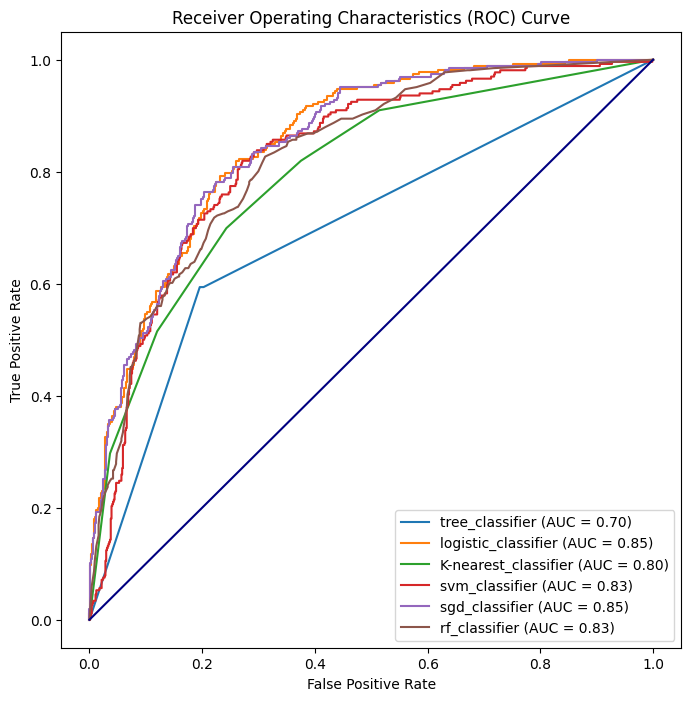

In [86]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}
    
# Iterate through models and apply SMOTE within the pipeline
for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline
    
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
ax.plot([0, 1], [0, 1], color='navy', linestyle='-')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristics (ROC) Curve')

# Add legend to the plot
ax.legend(loc='lower right')

# Show the plot after the for loop
plt.show()


* Insight:

From the above curve, the Logistic Classifier stands out as the preferred model. It becuase of its strong overall performance, particularly in achieving a balance between precision and recall for both churn and non-churn classes. The Logistic Classifier demonstrated good discrimination ability with a high ROC AUC value (0.85) and provided a comprehensive view of its performance through precision, recall, and F1-score metrics. Therefore, utilizing the Logistic Classifier as the preferred model for predicting customer churn allows for effective identification of potential churners while minimizing false positives.

In [87]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
roc_curve_data['logistic_classifier']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.003759,0.945396
2,0.000000,0.011278,0.944144
3,0.001350,0.011278,0.944133
4,0.001350,0.097744,0.931937
...,...,...,...
260,0.843455,0.992481,0.027661
261,0.843455,0.996241,0.027565
262,0.850202,0.996241,0.026720
263,0.850202,1.000000,0.026714


In [88]:
logistic_pipeline = all_pipeline['logistic_classifier']

logistic_y_pred = logistic_pipeline.predict(X_test)

matrix = confusion_matrix(y_test_encoded, logistic_y_pred)
matrix

array([[542, 199],
       [ 47, 219]], dtype=int64)

<Axes: >

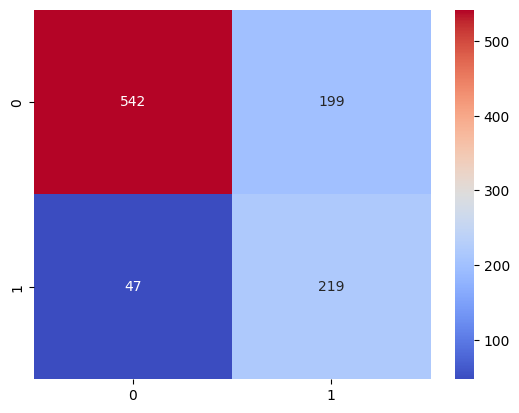

In [89]:
# visualizing the matrix
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

In [90]:
threshold = 0.28

y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

binary_prediction = (y_pred_proba >= threshold)

threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)
threshold_matrix

array([[412, 329],
       [ 14, 252]], dtype=int64)

<Axes: >

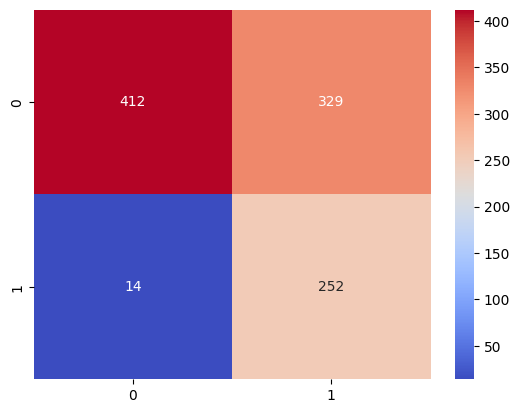

In [91]:
sns.heatmap(data=threshold_matrix, annot=True, fmt='d', cmap='coolwarm')

### Hyperparameter Tuning

In [92]:
param_grid = {
    'feature_importance__k': [5, 10, 20],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [100, 200, 300],
}

grid_search = GridSearchCV(
    logistic_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1')

grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001D5CF482470>>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['SeniorCitizen...
                                       ('feature_importance',
                                        SelectKBest(k=15,
                                                    score_func=functools.partial(<function mutual_info_classif at 0x000001D5C4350430>, random_state=42))),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2'],
                         'feature_importance__k': [5, 10, 20]},
             scoring='f1')

In [93]:
best_parameters = grid_search.best_params_
best_parameters

{'classifier__C': 0.01,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l2',
 'feature_importance__k': 20}

In [94]:
best_estimator = grid_search.best_estimator_


test_accuracy = best_estimator.score(X_test, y_test_encoded)
print("Test Accuracy", test_accuracy)

Test Accuracy 0.7567030784508441


### Retrain Model with Best Parameters

In [95]:
logistic_pipeline.set_params(**best_parameters)
logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x000001D5CF482470>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges',...
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=20,
                             score_func=functools.partial(<function mutual_info_classif at 0x000001D5C4350430>, random_state=42))),
                ('classifier', LogisticRegression(C=0.01, random_state=42))])

### Model Persistence

In [96]:
joblib.dump(logistic_pipeline, './models/finished_model.joblib')

joblib.dump(label_encoder, './models/encoder.joblib')

['./models/encoder.joblib']

## LOAD TEST DATASET

In [97]:

# Load the new test data from Excel
test_data = pd.read_excel('LP2_Test_Dataset_Telco-churn-last-2000.xlsx')
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [98]:
# viewing column names
test_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [99]:
# Drop 'customerID' column
test_data.drop('customerID', axis=1, inplace=True)

# Verify changes
test_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [100]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   SeniorCitizen     2000 non-null   int64  
 2   Partner           2000 non-null   object 
 3   Dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   PhoneService      2000 non-null   object 
 6   MultipleLines     2000 non-null   object 
 7   InternetService   2000 non-null   object 
 8   OnlineSecurity    2000 non-null   object 
 9   OnlineBackup      2000 non-null   object 
 10  DeviceProtection  2000 non-null   object 
 11  TechSupport       2000 non-null   object 
 12  StreamingTV       2000 non-null   object 
 13  StreamingMovies   2000 non-null   object 
 14  Contract          2000 non-null   object 
 15  PaperlessBilling  2000 non-null   object 
 16  PaymentMethod     2000 non-null   object 


In [101]:
# Change the datatype of the variable 'TotalCharges' to a float
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [102]:
# Load the pre-trained logistic regression pipeline and encoder models
logistic_pipeline_2 = joblib.load('./models/finished_model.joblib')
encoder = joblib.load('./models/encoder.joblib')

# Make predictions using the loaded logistic regression pipeline on test data
prediction = logistic_pipeline_2.predict(test_data)

# Define a threshold
threshold = 0.28

y_pred_proba = logistic_pipeline_2.predict_proba(test_data)[:, 1]

binary_prediction_2 = (y_pred_proba >= threshold)

# Print the predictions
print(binary_prediction_2)

[ True False False ...  True  True False]


In [103]:
# Add the predictions as a new column to the test_data DataFrame
test_data['Churn'] = binary_prediction_2

In [104]:
# Print the DataFrame with b predictions
test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,True
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,False
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,False
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,True
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,True
1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,False
1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,True
1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,True


In [105]:
# Iterate through each column and replace True/False with 'Yes'/'No'
test_data['Churn'] = test_data['Churn'].replace({True: 'Yes', False: 'No'})

test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,No
1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,Yes


In [106]:
# Count the occurrences of unique values in the 'Churn' column
test_data['Churn'].value_counts()

Churn
Yes    1180
No      820
Name: count, dtype: int64

Insights:

The model predicted the churn status of customers for the test dataset. The number of customers that churned were 1,180 (59%) and those who did not churn were 820 (41%)

## RECOMMENDATIONS
Utilizing the knowledge gained from analyzing this project, the subsequent suggestions involve implementing strategies to reduce and tackle the predicted customer churn as indicated by the model.


1. Optimize Payment Methods:

* Encourage customers to switch from "Electronic check" to more stable methods like "Bank transfer (automatic)" and "Credit card (automatic)."
* Offer discounts or exclusive benefits for customers using preferred payment methods.
* Provide clear communication about the advantages of stable payment methods, including reliability and convenience.
* Incentivize the adoption of automatic payment methods with exclusive discounts and simplified switching processes.

2. Emphasize Long-Term Commitments:

* Promote the benefits of longer-term contracts, especially the "Two-year" option.
* Offer special discounts, loyalty rewards, or bundled services for customers committing to extended contracts.
* Clearly communicate the potential cost savings and stability associated with longer commitments.

3. Dynamic and Personalized Retention Approaches:

* Develop a flexible customer retention strategy that adapts to the observed variability in churn rates.
* Utilize customer segmentation to tailor retention efforts based on individual contract durations, payment methods, and service usage patterns.
* Regularly analyze and update retention strategies to address changing customer behaviors and preferences.

4. Promote Essential Services:

* Emphasize the value of InternetService and PhoneService in customer communications.
* Create bundled service packages with attractive discounts to incentivize customers to retain these essential services.
* Implement targeted marketing campaigns highlighting the reliability and benefits of these core services.

5. Tailor Bundled Packages:

* Create bundled packages that combine longer contract terms with increased usage of Fiber Optic for internet service and phone services.
* Promote these bundled packages as comprehensive solutions with added value.
* Provide personalized recommendations to customers based on their usage patterns and preferences.

6. Personalized Communication and Incentives:

* Tailor communication and promotional materials to address the unique needs and preferences of non-Senior Citizens.
* Offer exclusive promotions or loyalty programs targeting non-Senior Citizens to enhance satisfaction and retention.
* Seek feedback from non-Senior Citizens to understand their concerns and improve service offerings.

## CONCLUSION
Our thorough examination of customer churn prediction, utilizing a varied set of machine learning classifiers, has provided valuable insights crucial for formulating precise retention strategies within the telecommunications industry. Significantly, the logistic regression model consistently stood out among these classifiers, showcasing superior performance, particularly in terms of recall for predicting customers likely to churn.

In this ever-evolving landscape, the fusion of model insights and strategic recommendations strategically places Vodafone to effectively navigate and mitigate customer churn, significantly enhancing the probability of success. Following a meticulous selection and tuning process, the logistic regression model emerged as the preeminent performer, showcasing notable sensitivity (recall) in accurately predicting churned customers.

The model's predictions, signaling 1,180 customers likely to churn and 820 expected to stay, underscore the critical importance of implementing effective retention strategies. The strategic recommendations presented, covering optimized payment methods, accentuated long-term commitments, dynamic retention approaches, promotion of essential services, tailored bundled packages, and personalized communication, align seamlessly to address anticipated churn and fortify overall customer retention.

As Vodafone advances, it is poised to harness predictive insights and targeted strategies to proactively navigate the challenges presented by customer churn. A commitment to continuous monitoring, adaptation, and customer-centric practices will play a pivotal role in ensuring the sustained success of these retention efforts.

The harmonious collaboration between a resilient predictive model and strategic retention initiatives distinctively empowers the telecommunications giant to accurately predict and manage customer churn. This flexible approach enables swift responses to changing market dynamics, reaffirming Vodafone's unwavering dedication to providing exceptional value to its customer base.